In [14]:
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import random

In [15]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [16]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

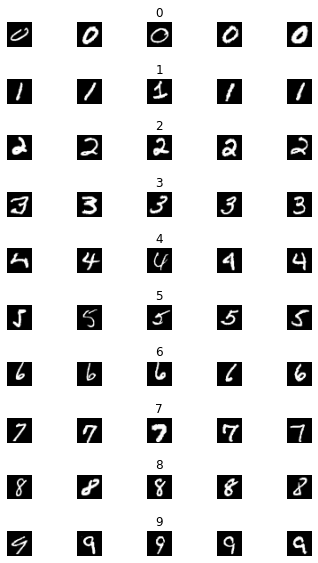

In [17]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

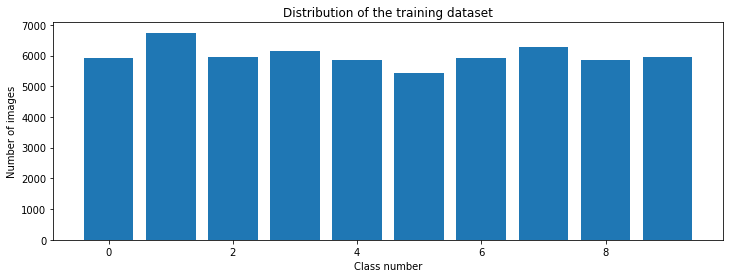

In [18]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
# Data normalization
X_train = X_train/255 
X_test = X_test/255
 

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/10
270/270 [==============================] - 4s 5ms/step - loss: 0.5698 - accuracy: 0.8196 - val_loss: 0.2694 - val_accuracy: 0.9210
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.9094 - val_loss: 0.2261 - val_accuracy: 0.9363
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2694 - accuracy: 0.9193 - val_loss: 0.2071 - val_accuracy: 0.9427
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2531 - accuracy: 0.9242 - val_loss: 0.1998 - val_accuracy: 0.9415
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2399 - accuracy: 0.9291 - val_loss: 0.2162 - val_accuracy: 0.9360
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2320 - accuracy: 0.9308 - val_loss: 0.2108 - val_accuracy: 0.9358
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2280 - accuracy: 0.9321 - val_loss: 0.2017 - val_accuracy: 0.9422
E

Text(0.5, 0, 'epoch')

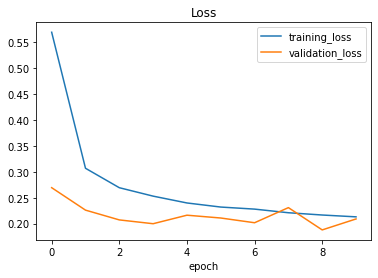

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

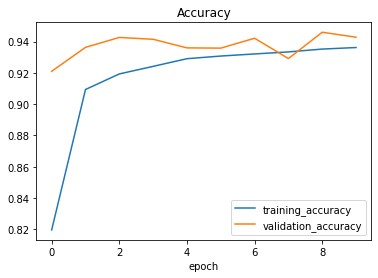

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.23881344497203827
Test accuracy: 0.9283999800682068


predicted digit: [2]


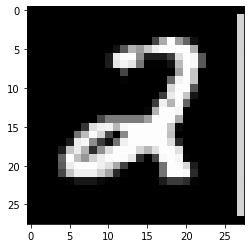

In [29]:
import requests
import cv2
from PIL import Image
 
# Obtaining new image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
# Resizing image, flattening, changing to grayscale, inverting colors using bitwise operations
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Datan normalizing
img = img/255
img = img.reshape(1, 784)
 

predict_x = model.predict(img) 
prediction = np.argmax(predict_x, axis=1)
#prediction = model.predict_classes(img)

print("predicted digit:", str(prediction))